# Lab 4: MRI Brain Scan Processing & Tumor Detection

**Objective:**
- Sharpen MRI images to enhance structural details
- Detect circular tumor-like patterns using template matching
- Analyze the effect of template rotation on detection accuracy
- Compare edge detection with sharpening


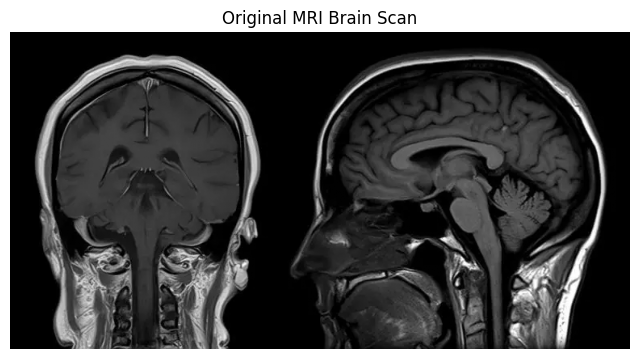

In [6]:
# Task 1: Load and Display MRI Image
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the provided MRI image
image = cv2.imread('mri.jpeg', cv2.IMREAD_GRAYSCALE)
if image is None:
    raise Exception('Image not found!')
plt.figure(figsize=(8,6))
plt.imshow(image, cmap='gray')
plt.title('Original MRI Brain Scan')
plt.axis('off')
plt.show()

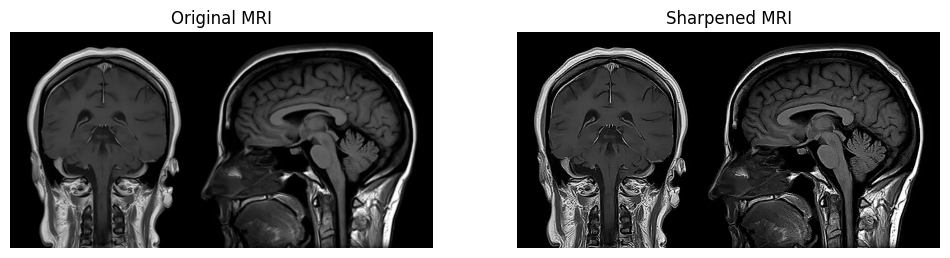

In [7]:
# Task 2: Sharpening Images (Convolution)
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
sharpened = cv2.filter2D(image, -1, sharpen_kernel)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('Original MRI')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(sharpened, cmap='gray')
plt.title('Sharpened MRI')
plt.axis('off')
plt.show()

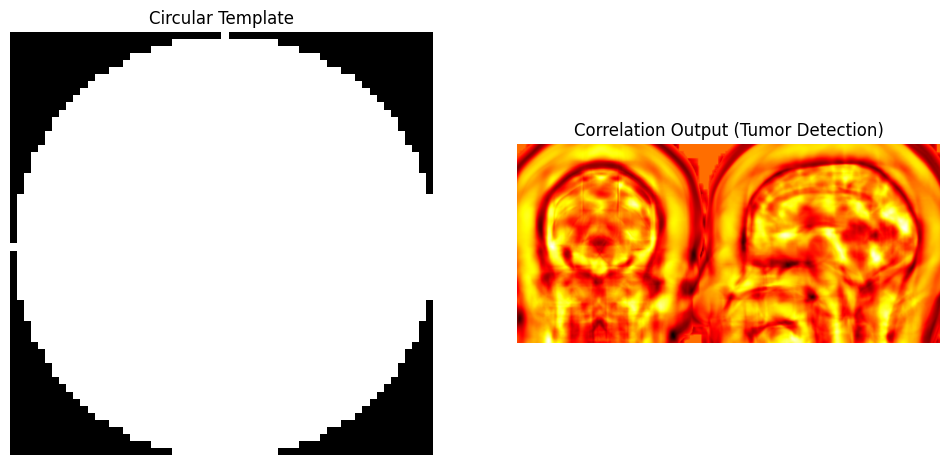

In [8]:
# Task 3: Pattern Detection (Correlation)
# Create a circular template (simulating a tumor)
template_radius = 30
template = np.zeros((2*template_radius, 2*template_radius), dtype=np.uint8)
cv2.circle(template, (template_radius, template_radius), template_radius, 255, -1)

# Perform template matching (correlation)
result = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(template, cmap='gray')
plt.title('Circular Template')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(result, cmap='hot')
plt.title('Correlation Output (Tumor Detection)')
plt.axis('off')
plt.show()

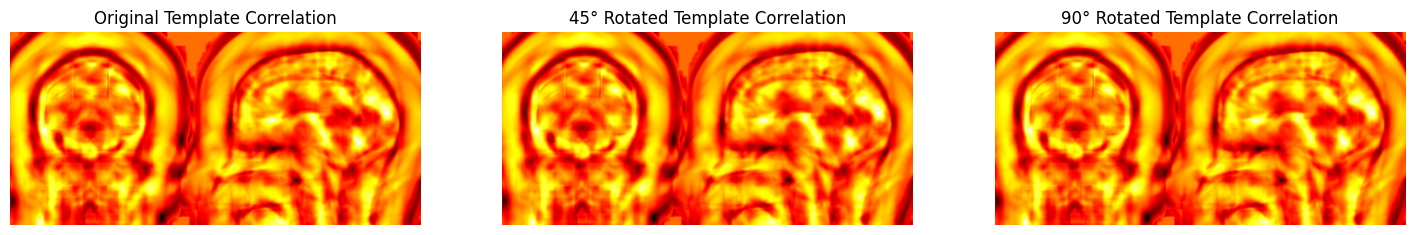

In [9]:
# Task 4: Rotation Experiment
# Rotate template by 45° and 90°
rot45 = cv2.warpAffine(template, cv2.getRotationMatrix2D((template_radius, template_radius), 45, 1), (2*template_radius, 2*template_radius))
rot90 = cv2.warpAffine(template, cv2.getRotationMatrix2D((template_radius, template_radius), 90, 1), (2*template_radius, 2*template_radius))

# Correlation with rotated templates
result45 = cv2.matchTemplate(image, rot45, cv2.TM_CCOEFF_NORMED)
result90 = cv2.matchTemplate(image, rot90, cv2.TM_CCOEFF_NORMED)

plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.imshow(result, cmap='hot')
plt.title('Original Template Correlation')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(result45, cmap='hot')
plt.title('45° Rotated Template Correlation')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(result90, cmap='hot')
plt.title('90° Rotated Template Correlation')
plt.axis('off')
plt.show()

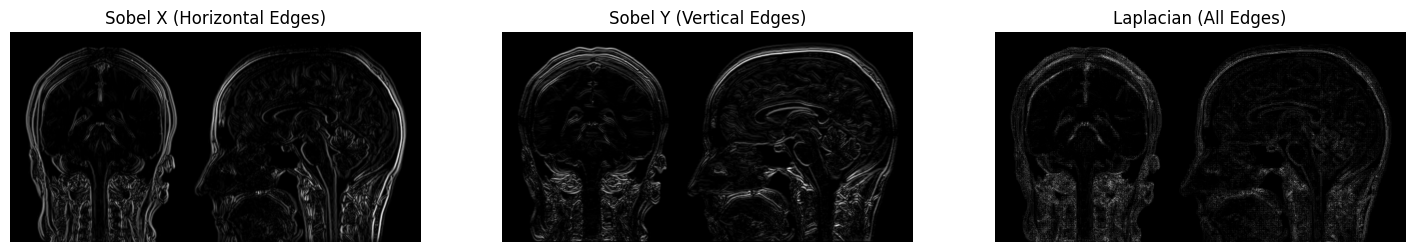

In [10]:
# Optional Challenge: Edge Detection
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
laplacian = cv2.Laplacian(image, cv2.CV_64F)

plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.imshow(np.abs(sobelx), cmap='gray')
plt.title('Sobel X (Horizontal Edges)')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(np.abs(sobely), cmap='gray')
plt.title('Sobel Y (Vertical Edges)')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(np.abs(laplacian), cmap='gray')
plt.title('Laplacian (All Edges)')
plt.axis('off')
plt.show()

## Observation & Analysis

- **Sharpening:** Structural details (edges, boundaries) in the MRI become more prominent, making it easier to spot abnormalities.
- **Pattern Detection:** Correlation output highlights regions similar to the circular template, indicating possible tumor locations.
- **Rotation Experiment:** Rotating the template affects detection accuracy; some tumors may be missed if their orientation does not match the template.
- **Edge Detection:** Sobel and Laplacian filters highlight boundaries and edges, useful for analyzing structures and comparing with sharpening results.

**Challenges:**
- Template matching is sensitive to shape, size, and orientation.
- Tumors with irregular shapes or different orientations may not be detected.

**Suggestions:**
- Use multiple templates of different shapes and rotations.
- Employ advanced methods (e.g., deep learning) for robust tumor detection.

**Real-world Application:**
- Automated tumor detection in medical imaging assists radiologists, improves diagnosis, and supports treatment planning.
